In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras 

from sklearn.metrics import accuracy_score

In [91]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [92]:
X_train.shape

(60000, 28, 28)

In [93]:
X_test.shape

(10000, 28, 28)

In [94]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [95]:
X_train = X_train/255
X_test = X_test/255

1


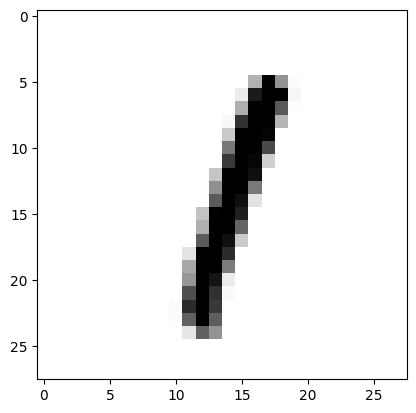

In [122]:
index =5

plt.imshow(X_test[index], cmap=plt.cm.binary)
print(Y_test[index])

In [97]:
X_train.shape

(60000, 28, 28)

In [98]:
X_train_flat = X_train.reshape(len(X_train),(28*28))
X_test_flat = X_test.reshape(len(X_test),(28*28))

In [99]:
X_train_flat.shape

(60000, 784)

In [100]:
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flat, Y_train, epochs=5)

Epoch 1/5


c:\Users\raich\OneDrive\Desktop\Code\jupyter\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7525 - loss: 0.9639
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9609 - loss: 0.1426
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9754 - loss: 0.0885
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9811 - loss: 0.0647
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9877 - loss: 0.0433


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


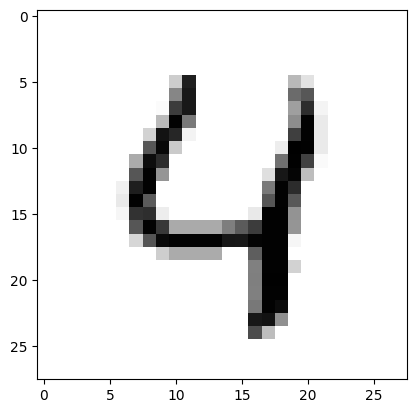

Predicted class for the first data point: 4


In [101]:
# Get the prediction for the first data point in the test set
index = 4

prediction = model.predict(X_test_flat[index:(index+1)])

# Display the image of the first data point in the test set
plt.imshow(X_test_flat[index].reshape(28, 28), cmap=plt.cm.binary)  # Assuming image size is 28x28
plt.show()

# Get the predicted class (the class with the highest probability)
predicted_class = np.argmax(prediction)

# Display the predicted class
print("Predicted class for the first data point:", predicted_class)

In [102]:
model.evaluate(X_test_flat, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9668 - loss: 0.1158


[0.09686155617237091, 0.972000002861023]

In [103]:
Y_pred = model.predict(X_test_flat)
Y_pred_labels = [np.argmax(i) for i in Y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step


Text(50.722222222222214, 0.5, 'Truth')

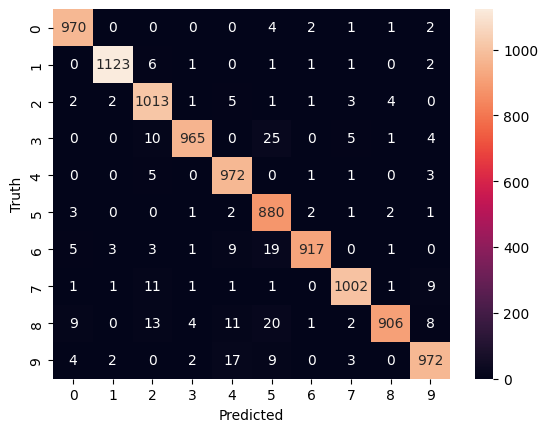

In [104]:
confusion_matrix = tf.math.confusion_matrix(labels=Y_test, predictions=Y_pred_labels)
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [105]:

# Save the trained model
model.save('mnist_model.keras')
print("Model saved successfully!")

Model saved successfully!


#CV DOO DOO

In [106]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,440 (1.27 MB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,294 (868.34 KB)

In [107]:
print(model.input_shape)


(None, 784)


In [108]:
print(img_array.shape)


(28, 28, 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


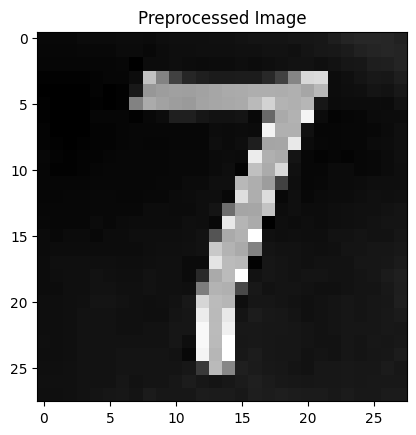

Predicted class for the custom image: 2


In [142]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the image
image = cv2.imread('7.jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image.")
    exit()

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize to 28x28
resized_image = cv2.resize(gray_image, (28, 28))

# Invert colors (if necessary)
#inverted_image = cv2.bitwise_not(resized_image)

# Normalize pixel values to [0, 1]
normalized_image = resized_image / 255.0

# Flatten the image (optional)
flattened_image = normalized_image.flatten()

# Reshape the flattened image to (1, 784) for model prediction
input_image = flattened_image.reshape(1, 784)

# Load your trained model (replace 'model.h5' with your model file)
model = load_model('mnist_model.keras')  # Ensure you have a trained model saved as 'model.h5'

# Get the prediction for the custom image
prediction = model.predict(input_image)

# Display the preprocessed image
plt.imshow(normalized_image, cmap=plt.cm.binary)  # Use normalized_image for visualization
plt.title("Preprocessed Image")
plt.show()

# Get the predicted class (the class with the highest probability)
predicted_class = np.argmax(prediction)

# Display the predicted class
print("Predicted class for the custom image:", predicted_class)

